# Assignment - 4 - Clustring

In [1]:
# import necasseray libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data From the Excel file using read_excel from pandas library
data = pd.read_excel(r"C:\Users\khale\Documents\Sprints\Dataset_(1)\Online Retail.xlsx")

# printing the shape of the dataset
print(f"DataSet Shape: {data.shape}")

# Showing the first five rows of the dataset
data.head()

DataSet Shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Taking a copy of the row data to work on it.
df = data.copy()

- We Can extract new column from the 'InvoiceDate' column.

In [4]:
# Getting the year from the date with year attribute from 'datetime' module
df['InvoiceYear'] = df['InvoiceDate'].dt.year
# Getting the day name from the date with day_name attribute from 'datetime' module
df['InvoiceDay'] = df['InvoiceDate'].dt.day_name()
# Getting the month from the date with month attribute from 'datetime' module
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
# Getting the year quarter from the date with quarter attribute from 'datetime' module
df['InvoiceQuarter'] = df['InvoiceDate'].dt.quarter
# Showing the first five rows after the new columns
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceDay,InvoiceMonth,InvoiceQuarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,Wednesday,12,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Wednesday,12,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,Wednesday,12,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Wednesday,12,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,Wednesday,12,4


In [5]:
# Sowing the main information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   InvoiceNo       541909 non-null  object        
 1   StockCode       541909 non-null  object        
 2   Description     540455 non-null  object        
 3   Quantity        541909 non-null  int64         
 4   InvoiceDate     541909 non-null  datetime64[ns]
 5   UnitPrice       541909 non-null  float64       
 6   CustomerID      406829 non-null  float64       
 7   Country         541909 non-null  object        
 8   InvoiceYear     541909 non-null  int64         
 9   InvoiceDay      541909 non-null  object        
 10  InvoiceMonth    541909 non-null  int64         
 11  InvoiceQuarter  541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 49.6+ MB


- We can see that our data have some missing data that we need to deal with.
- The column's data types is reasonable.
- We have 5 Strng columns (Object), 4 integer columns, 3 float column and one datetime column.

In [6]:
# Calculating the number of missing data at evey column.
df.isnull().sum()

InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        135080
Country                0
InvoiceYear            0
InvoiceDay             0
InvoiceMonth           0
InvoiceQuarter         0
dtype: int64

- We will fill the Misssing Data With 'No Desc' for 'Description' column.
- and a random number in the same range of the 'CustomerID' values for 'CustomerID' column using the 'np.random' module.
- np.random.randint => generates a random integet between the given values.

In [7]:
df['Description'].fillna("No Desc", inplace = True)
df['CustomerID'].fillna(np.random.randint(12000, 18001, size = 1)[0], inplace = True)

In [8]:
# Calculating the number of missing data at evey column after filling it.
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
InvoiceYear       0
InvoiceDay        0
InvoiceMonth      0
InvoiceQuarter    0
dtype: int64

In [9]:
# Calculating the number of duplicated rows.
print(f"Number Of Duplicated Values: {df.duplicated().sum()}")

Number Of Duplicated Values: 5268


- We will have to remove this duplicated rows.

In [10]:
df.drop_duplicates(inplace = True)
print(f"Number Of Duplicated Values After Dropping: {df.duplicated().sum()}")

Number Of Duplicated Values After Dropping: 0


In [11]:
# describe => to clarify the main statistical charactaristics of the data.
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,InvoiceQuarter
count,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000,536641.000000
mean,9.620029,4.632656,15177.195602,2010.921771,7.544820,2.831938
std,219.130156,97.233118,1493.555220,0.268532,3.508696,1.136995
min,-80995.000000,-11062.060000,12346.000000,2010.000000,1.000000,1.000000
25%,1.000000,1.250000,14367.000000,2011.000000,5.000000,2.000000
50%,3.000000,2.080000,14868.000000,2011.000000,8.000000,3.000000
75%,10.000000,4.130000,16241.000000,2011.000000,11.000000,4.000000
max,80995.000000,38970.000000,18287.000000,2011.000000,12.000000,4.000000


- Our data Seem to have some outliers and bad scales.

In [12]:
df['Quantity'] = np.abs(df['Quantity'])
df['UnitPrice'] = np.abs(df['UnitPrice'])
df = df[(df['UnitPrice'] >= 0.5) & (df['UnitPrice'] <= 5000)]
df = df[df['Quantity'] <= 5000] 

- Taking the absolute value for the negative values in 'Quantity', 'UnitPrice' columns.
- limiting the ranges of both columns to be:
- [0.5:5000] for 'UnitPrice' column.
- [ <= 5000] for 'Quantity' column.

In [13]:
# After Removing the outliers.
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,InvoiceQuarter
count,491518.000000,491518.000000,491518.000000,491518.000000,491518.000000,491518.000000
mean,8.831613,4.456747,15172.796117,2010.919195,7.525663,2.824222
std,32.193907,33.951116,1482.678895,0.272535,3.523353,1.141084
min,1.000000,0.500000,12347.000000,2010.000000,1.000000,1.000000
25%,1.000000,1.450000,14407.000000,2011.000000,5.000000,2.000000
50%,3.000000,2.460000,14868.000000,2011.000000,8.000000,3.000000
75%,10.000000,4.150000,16204.000000,2011.000000,11.000000,4.000000
max,4300.000000,4575.640000,18287.000000,2011.000000,12.000000,4.000000


In [14]:
# Constructing the 'TotalPrice' column from 'UnitPrice', 'Quantity' columns.
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']
# Constructing the 'DayRecent' column from 'InvoiceDate' column to get the .
df['DayRecent'] = (df['InvoiceDate'].max() - df['InvoiceDate']).dt.days
# Removing the outliers from the 'TotalPrice' column.
df = df[df.TotalPrice <= 5000]

In [15]:
df.describe()

,Quantity,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,InvoiceQuarter,TotalPrice,DayRecent
count,491512.000000,491512.000000,491512.000000,491512.000000,491512.000000,491512.000000,491512.000000,491512.000000
mean,8.809716,4.446991,15172.793484,2010.919194,7.525686,2.824228,20.883530,159.125179
std,31.202517,33.416975,1482.678929,0.272537,3.523352,1.141085,74.650013,116.234732
min,1.000000,0.500000,12347.000000,2010.000000,1.000000,1.000000,0.500000,0.000000
25%,1.000000,1.450000,14407.000000,2011.000000,5.000000,2.000000,4.130000,51.000000
50%,3.000000,2.460000,14868.000000,2011.000000,8.000000,3.000000,10.140000,144.000000
75%,10.000000,4.150000,16204.000000,2011.000000,11.000000,4.000000,17.700000,259.000000
max,4300.000000,4575.640000,18287.000000,2011.000000,12.000000,4.000000,4992.000000,373.000000


## Data Analysis

- What is the quarter that has the most Total Price?

In [18]:
# Grouping Each Quarter by its sum of orice.
q_price = df.groupby('InvoiceQuarter')['TotalPrice'].sum().sort_values(ascending = False).astype(int)
q_price

InvoiceQuarter
4    3911739
3    2504460
2    2011816
1    1836488
Name: TotalPrice, dtype: int32

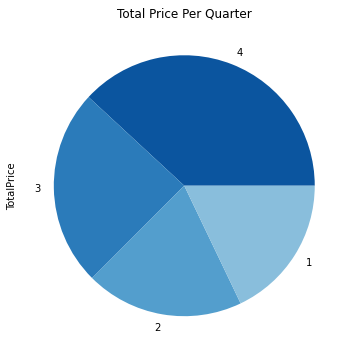

In [19]:
# Plotting the result
q_price.plot(kind = "pie", colors = sns.color_palette("Blues_r"), figsize = (12, 6), title = "Total Price Per Quarter");

- As we see the quarters in the end of the year have more total price than in the first half of the year.

- Which year have the most Invoices in our data?

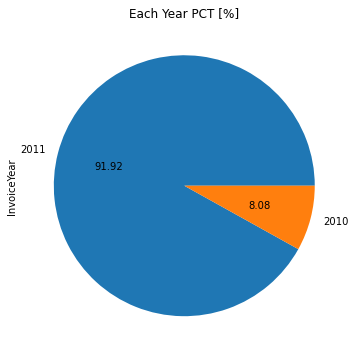

In [19]:
# Plotting each year percenrage in the data to get the difference.
year_pct = df['InvoiceYear'].value_counts(normalize = True)
year_pct.plot(
    kind = "pie", 
    autopct = "%.2f", 
    figsize = (10, 6),
    title = "Each Year PCT [%]"
);

In [20]:
# Grouping each day 
day_mprofit = df.groupby('InvoiceDay').agg({"InvoiceDay": "count", "TotalPrice": "sum"}).sort_values(ascending = False,
                                                                                                     by = "TotalPrice")
day_mprofit.columns = ["Count", "TotalPrice"]
day_mprofit

,Count,TotalPrice
InvoiceDay,,
Thursday,94164,2179607.97
Tuesday,93060,2045997.42
Wednesday,85500,1836403.24
Monday,87210,1817307.90
Friday,74981,1609984.23
Sunday,56597,775204.67


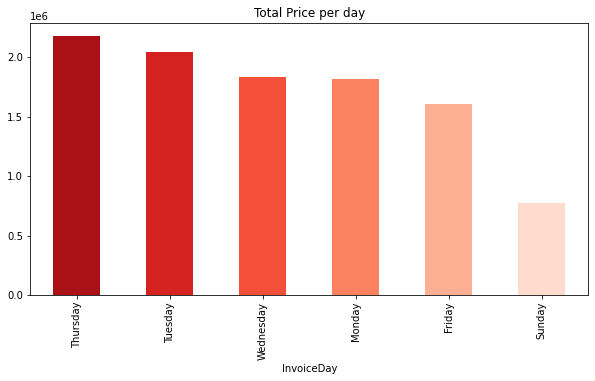

In [21]:
# bar plot to illustrate the difference.
day_mprofit['TotalPrice'].plot(
    kind = "bar", 
    color = sns.color_palette("Reds_r"), 
    figsize = (10, 5), 
    title = "Total Price per day"
);

- What is the country that have the biggest TotalPrice from this transactions?

In [22]:
# Grouping Each country by its sum prie.
country_tp = df.groupby("Country")['TotalPrice'].sum().sort_values(ascending = False)
country_tp.head()

Country
United Kingdom    8616087.84
EIRE               292336.25
Netherlands        273089.94
Germany            228206.93
France             206984.23
Name: TotalPrice, dtype: float64

- We can see the united kingdom has the biggest number of transactions in our data by far.

- What is the biggest stock that are spent on in UK?

In [23]:
# making a data frame for the data of 'United Kingdom'.
uk_df = df[df['Country'] == "United Kingdom"]

# Grouping the stocks with its description by its total price to get which stocks are the biggest in UK. 
# And sorting it to get the biggest on top.
stock_price = uk_df.groupby(["StockCode", "Description"])['TotalPrice'].sum().sort_values(ascending = False).to_frame()

# Plotting the first five rows (The highest).
stock_price.head()

,,TotalPrice
StockCode,Description,
DOT,DOTCOM POSTAGE,206251.71
22423,REGENCY CAKESTAND 3 TIER,149837.94
85123A,WHITE HANGING HEART T-LIGHT HOLDER,105036.79
47566,PARTY BUNTING,94756.23
85099B,JUMBO BAG RED RETROSPOT,88246.00


## ML Model - KMeans Clustering 

In [20]:
# Extracting the feature matrix from the dataframe
X = df[['CustomerID', 'TotalPrice', 'DayRecent', 'InvoiceMonth']].set_index("CustomerID")

# Showing the Shape of the feature matrix.
X.shape

(491512, 3)

- Implementing Elbow method to figure out what is the best number of clusters.

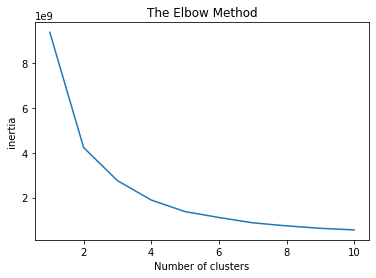

In [25]:
# Making an empty list to get the different inertias that results from different number of clusters.
inertia = []

#Looping over a range of cluster numbers and getting their inertia
for k in range(1, 11):   
    # Inasializing the model.
    kmeans = KMeans(n_clusters = k)
    
    # Training the model.
    kmeans.fit(X)
    
    # Calculating the inetia for the model of each k and appending it to the lis of inertias.
    inertia.append(kmeans.inertia_)

# Plotting thr result of inertias to get the best number of clusters.
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

- As we can see that the convergence happend on the k = 3 point so it's resonable to choose 3 as number of clusters.

In [21]:
# initializing the 'kmeans' model with number of clusters = 3.
kmeans = KMeans(n_clusters = 3)

# Fitting the model to the feature matrix.
# labeling each row with its cluster number in a new column 'cluster'.
X['cluster'] = kmeans.fit_predict(X)

### Illustrating the cluster on a scatter plot to show the difference between them.

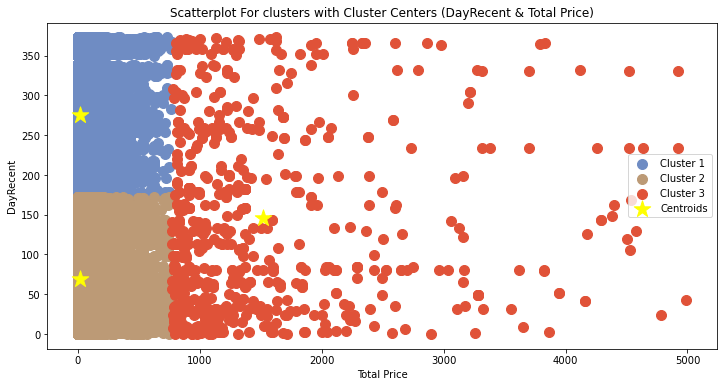

In [22]:
# Determining the figure size
plt.figure(figsize=(12, 6))

# Plotting each cluster points on the same graph with different colors.
plt.scatter(X.values[X['cluster'] == 0, 0], X.values[X['cluster'] == 0, 1], s = 100, c = "#6f8cc3", label = 'Cluster 1')
plt.scatter(X.values[X['cluster'] == 1, 0], X.values[X['cluster'] == 1, 1], s = 100, c = "#bc9a76", label = 'Cluster 2')
plt.scatter(X.values[X['cluster'] == 2, 0], X.values[X['cluster'] == 2, 1], s = 100, c = "#e05238", label = 'Cluster 3')

# Plotting each cluster center with another shape (Star) than its cluster points on the same graph.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids', marker = '*')

# Specifing the legend and axes labels on the graph.
plt.legend()
plt.xlabel('Total Price')
plt.ylabel('DayRecent')
plt.title('Scatterplot For clusters with Cluster Centers (DayRecent & Total Price)');

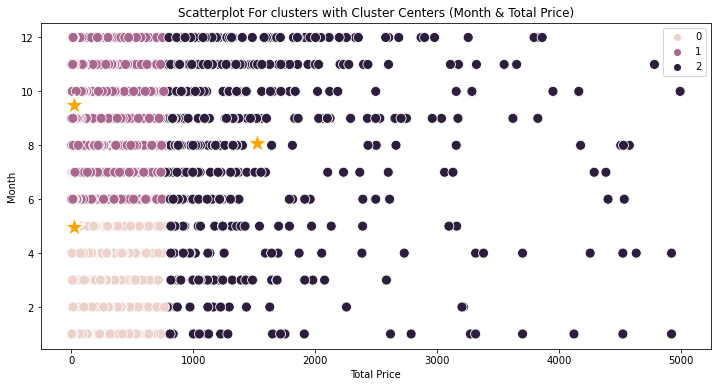

In [24]:
# Determining the figure size
plt.figure(figsize=(12, 6))

# Plotting each cluster points on the same graph with different colors from the hue argument.
sns.scatterplot(x = X.iloc[:, 0], y = X.iloc[:, 2], hue = X['cluster'], s = 100)

# Plotting each cluster center with another shape (Star) than its cluster points on the same graph.
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 2], s = 500, marker = '*', color = 'orange')


# Specifing the title and axes labels on the graph.
plt.xlabel('Total Price')
plt.ylabel('Month')
plt.title('Scatterplot For clusters with Cluster Centers (Month & Total Price)');

- What is the total price for each cluster?

In [30]:
# Grouping each cluster by the sum of its price.
cluster_total = X.groupby("cluster")['TotalPrice'].sum().sort_values(ascending = False)
cluster_total

cluster
0    5242850.71
1    4017731.12
2    1003923.60
Name: TotalPrice, dtype: float64

- The sum of total price for each cluster.

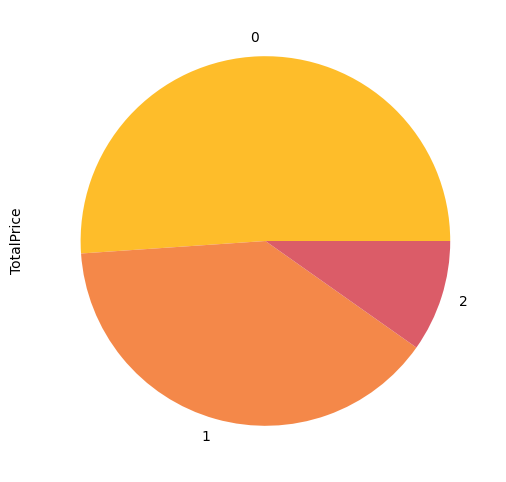

In [31]:
# Plotting a pie Chart to illustrate the diggerence between clusters.
cluster_total.plot.pie(colors = sns.color_palette("plasma_r"), figsize = (12, 6));

- Cluster 1 has the biggest Sum of Price and Cluster 0 comes right after it.